# Когнитивные технологии

*Алла Тамбовцева*

## Непрерывные случайные величины: практикум в Python

### Немного теории

Непрерывные случайные величины – величины, которые принимают бесконечное множество значений. Из-за того, что множество значений бесконечно, вероятность вида $P(X=x_0)$, где $x_0$ – некоторое значение непрерывной случайной величины $X$, равна $0$. Непрерывные случайные величины описываются в помощью функции распределения (английский эквивалент *cumulative density function*, часто сокращается до *cdf*) и функции плотности распределения (английский эквивалент *probability density function*, часто сокращается до *pdf*). Функция распределения для непрерывной величины, в отличие от дискретной, определяется однозначно, поскольку:

$$
F(x) = P(X\leqslant x) = P(X<x).
$$

Функция плотности распределения определяется как производная функции распределения: 

$$
f(x) = F'(x).
$$

Если посмотреть на функцию распределения, видно, что это функция монотонно не убывает: она «накапливает» вероятности и за счёт этого с ростом значений $X$ значения самой функции увеличиваются. Отсюда следует, что $f(x)\geqslant 0$. Плюс, так как площадь под графиком функции плотности на участке от $-\infty$ до $+\infty$ сопоставима с результатом суммирования вероятностей всех возможных интервалов значений, отсюда вытекает следующее свойство: $\int\limits_{-\infty}^{+\infty}f(x)dx = 1$.


Для непрерывной случайной величины $X$ с функцией плотности вероятности $f(x)$ и $a<b$:

$$
P(a < X < b) = F(b)-F(a) = \int\limits_{a}^{b} f(x) dx.
$$

Геометрически это означает, что вероятность попадания значений случайной в промежуток от $a$ до $b$ равна площади под графиком функции плотности вероятности на этом промежутке. 

Так как общие математические факты вряд ли вызовут затруднения у слушателей, хотелось бы предложить разобраться, как некоторые вещи можно проиллюстрировать в Python.

Рассмотрим функцию плотности распределения непрерывной случайной величины со следующей функцией распределения:

$$
f(x) = \begin{cases} 
\frac{2}{9} x, & x \in (0, 3)\\
0, & x \notin (0, 3)\\
\end{cases}
$$

Построим её график.

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline

Возьмём $100$ точек из диапазона от $-10$ до $3$, а затем применим к получившему массиву кусочно-заданную функцию с помощью метода `.piecewise()`. Для этого нужно задать область определения функции в рамках нашей задачи (здесь массив `xs`), сформулировать условия и задать значения, которые принимает функция в зависимости от выполнения условий. 

In [65]:
xs1 = np.linspace(-10, 3, 100)

# одновременное выполнение условий записывается через *, или-или – через +
# сначала условия (в нашем случае второе можно оставить пустым, так как условия взаимоисключающие)
# потом значения (через lambda-функцию или просто число)

fx1 = np.piecewise(xs1, 
                  [(xs1 >= 0) * (xs1 < 3), ], 
                  [lambda x: 2/9 * x, 0])

Добавим часть для графика для $x>3$ (не стали рисовать сразу, чтобы избежать соединяющей вертикальной линии, которая явно лишняя):

In [79]:
xs2 = np.linspace(3, 10, 100)
fx2 = np.piecewise(xs2, [x2>3], [0, 0])

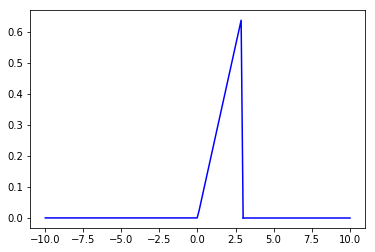

In [90]:
plt.plot(xs1, fx, 'b')
plt.plot(xs2, fx2, 'b')

Теперь закрасим площадь под графиком, которая соответствует вероятности $P(0<X<2)$.

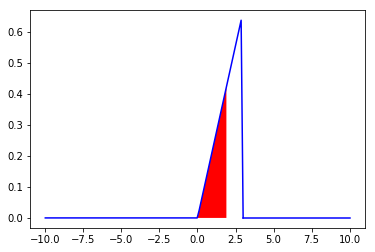

In [96]:
interval = np.arange(0, 2, 0.1)  # интервал от 0 до 2, шаг 0.1
plt.plot(xs1, fx, 'b')
plt.plot(xs2, fx2, 'b')
plt.fill_between(interval, pdf(interval), facecolor = 'red')

Получилось!

Для полноты изложения запишем формулы для математического ожидания и дисперсии для непрерывных случайных величин:

$$
E(X) = \int\limits_{-\infty}^{+\infty} x \cdot f(x) dx
$$

$$
D(X) = \int\limits_{-\infty}^{+\infty} x^2 \cdot f(x) dx - \big(\int\limits_{-\infty}^{+\infty} x \cdot f(x) dx\big)^2
$$

Перейдём к практике – генерации случайных величин из известных распределений и расчёту их характеристик. Импортируем модуль `stats`:

In [97]:
import scipy.stats as st

### Равномерное распределение

**Общие факты**

Плотность вероятности равномерной случайной величины:

$$f(x) = 
\begin{cases} 
\frac{1}{b-a} & x \in (a,b)\\
0 & x \notin [a,b]\\
\end{cases}$$

Несложно вывести первые два момента этого распределения:

$$
E(X) = \frac{a+b}{2}
$$

$$
D(X) = \frac{(b-a)^2}{12}
$$.

Сгенерируем равномерную случайную величину с $a=2$ и $b=8$:

In [100]:
u = st.uniform(2, 8)

Найдём математическое ожидание и дисперсию:

In [105]:
u.stats()  # по умолчанию математическое ожидание и дисперсия

(array(6.), array(5.33333333), array(0.), array(-1.2))

Посчитаем значение функции распределения в точке $2.5$, то есть $f(2.5)$:

In [109]:
u.pdf(2.5)  # pdf - probability density function

0.125

Посчитаем значение функции распределения в точке $2.5$, то есть $F(2.5) = P(X < 2.5) = \int\limits_{-\infty}^{2.5} f(x) dx$: 

In [110]:
u.cdf(2.5)

0.0625

А теперь $P(0<X<2.45)$:

In [112]:
u.cdf(2.45) - u.cdf(0)

0.05625000000000002

Конечно, это не исчерпывающий список операций, некоторые из них мы рассмотрим далее, на примере нормальной случайной величины.

### Нормальное распределение

**Общие факты**

Плотность вероятности нормальной случайной величины с $E(X) = a$ и $D(X) = \sigma^2$:
$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma} \cdot e^{-\frac{(x-a)^2}{2\sigma^2}}.
$$

По умолчанию, если при генерировании случайной величины мы не указываем математического ожидания и дисперсии, возвращается стандартная нормальная величина с $E(X)=0$ и $D(X)=1$.

In [124]:
normal = st.norm()
normal.stats()

(array(0.), array(1.))

Сгенерируем величину $X \sim N(a = 4, \sigma^2 = 9)$:

In [125]:
x = st.norm(4, 3)  # указываем математическое ожидание и станд отклонение, не D(X)
x.stats()

(array(4.), array(9.))

Построим график плотности:

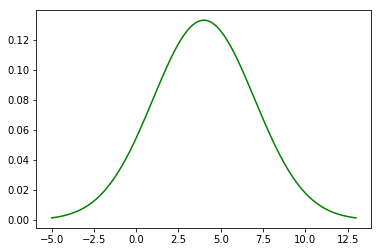

In [132]:
x = np.linspace(-5, 13, 200)  # границы (a-3*sigma; a+3*sigma)
fx = st.norm.pdf(x, 4, 3) # значений функции плотности
plt.plot(x, fx, 'g')

Наложим график плотности нормальной величины с таким же математическим ожиданием, но с меньшей дисперсией (стандартным отклонением):

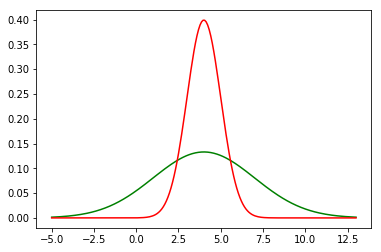

In [144]:
x = np.linspace(-5, 13, 200)  # границы (a-3*sigma; a+3*sigma)
fx1 = st.norm.pdf(x, 4, 3) # значений функции плотности 1
fx2 = st.norm.pdf(x, 4, 1) # значений функции плотности 2
plt.plot(x, fx1, 'g')
plt.plot(x, fx2, 'r')

Для величины $X \sim N(a = 4, \sigma^2 = 9)$ найдём квантиль уровня $0.3$, то есть значение $x_{0.3}$ случайной величины такое, что $P(X<x_{0.3}) = 0.3$:

In [137]:
normal.ppf(0.3)

-0.5244005127080409

Посчитаем энтропию распределения:

In [142]:
normal.entropy() 

array(1.41893853)

Энтропия непрерывной случайной величины считается так:
    
$$
H(X) = -E(\ln f(x) = - \int\limits_{-\infty}^{+\infty} f(x) \ln f(x) dx
$$



Примеры других распределений будет предложено рассмотреть в домашнем задании, плюс, некоторые распределения (распределение Стьюдента и распределение хи-квадрат) мы обсудим в части, посвящённой статистике.